In [13]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.models import Model
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.metrics import MeanAbsolutePercentageError
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

-    datadate - Date of the Data
-    tic - Ticker Symbol
-    conm - Company Name
-    datacqtr - Year and Quarter of the Data
-    atq - Assets - Total
-    chq - Cash
-    cogsq - Cost of Goods Sold
-    ibq - Income Before Extrodinary Items
-    invtq - Inventories - Total
-    saleq - Sales/Turnover (Net)
-    xrdq - Research and Development Expenses
-    prccq - Price Close - Quarter

In [2]:
data = pd.read_csv("hwdata.csv")

In [3]:
data = data.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1)
data

,datadate,tic,conm,datacqtr,atq,chq,cogsq,dlttq,ibq,invtq,saleq,xrdq,xsgaq,prccq
0,19620331,BA,BOEING CO,1962Q1,NaN,NaN,NaN,NaN,8.041,NaN,466.8,NaN,NaN,50.1250
1,19620630,BA,BOEING CO,1962Q2,NaN,NaN,NaN,NaN,7.439,NaN,366.9,NaN,NaN,36.7500
2,19620930,BA,BOEING CO,1962Q3,NaN,NaN,NaN,NaN,6.099,NaN,434.7,NaN,NaN,37.9999
3,19621231,BA,BOEING CO,1962Q4,NaN,NaN,NaN,NaN,5.575,NaN,500.1,NaN,NaN,37.1249
4,19630331,BA,BOEING CO,1963Q1,NaN,NaN,NaN,NaN,4.410,NaN,483.8,NaN,NaN,36.2499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5468,20181231,PGR,PROGRESSIVE CORP-OHIO,2018Q4,46575.0,69.5,7666.0,4404.9,264.700,0.0,8028.8,NaN,NaN,60.3300
5469,20190331,PGR,PROGRESSIVE CORP-OHIO,2019Q1,48850.3,158.0,7608.4,4616.8,1078.400,0.0,9293.8,NaN,NaN,72.0900
5470,20190630,PGR,PROGRESSIVE CORP-OHIO,2019Q2,51324.2,91.9,8073.5,4610.2,979.400,0.0,9444.5,NaN,NaN,79.9300
5471,20190930,PGR,PROGRESSIVE CORP-OHIO,2019Q3,54008.1,45.9,8394.6,4610.6,841.700,0.0,9524.6,NaN,NaN,77.2500


In [5]:
hwdatasorted = data.sort_values(by = ['tic', 'datacqtr']).reset_index(drop = True)
hwdatasorted

,datadate,tic,conm,datacqtr,atq,chq,cogsq,dlttq,ibq,invtq,saleq,xrdq,xsgaq,prccq
0,19620331,BA,BOEING CO,1962Q1,NaN,NaN,NaN,NaN,8.041,NaN,466.8,NaN,NaN,50.1250
1,19620630,BA,BOEING CO,1962Q2,NaN,NaN,NaN,NaN,7.439,NaN,366.9,NaN,NaN,36.7500
2,19620930,BA,BOEING CO,1962Q3,NaN,NaN,NaN,NaN,6.099,NaN,434.7,NaN,NaN,37.9999
3,19621231,BA,BOEING CO,1962Q4,NaN,NaN,NaN,NaN,5.575,NaN,500.1,NaN,NaN,37.1249
4,19630331,BA,BOEING CO,1963Q1,NaN,NaN,NaN,NaN,4.410,NaN,483.8,NaN,NaN,36.2499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5468,20181231,XRX,XEROX HOLDINGS CORP,2018Q4,14874.0,1084.0,1371.0,4269.0,137.000,818.0,2533.0,78.0,639.0,19.7600
5469,20190331,XRX,XEROX HOLDINGS CORP,2019Q1,14799.0,723.0,1168.0,4533.0,84.000,859.0,2180.0,77.0,638.0,31.9800
5470,20190630,XRX,XEROX HOLDINGS CORP,2019Q2,14684.0,712.0,1246.0,4216.0,141.000,788.0,2263.0,73.0,605.0,35.4100
5471,20190930,XRX,XEROX HOLDINGS CORP,2019Q3,14660.0,922.0,1179.0,3465.0,157.000,758.0,2179.0,8.4,610.0,29.9100


In [6]:
tics = list(hwdatasorted['tic'].unique())
tics[0:5]

['BA', 'CMA', 'COP', 'DIS', 'DTE']

In [7]:
hwdatasorted['stock_return'] = (hwdatasorted.groupby('tic')['prccq'].apply(pd.Series.pct_change))
hwdatasorted

,datadate,tic,conm,datacqtr,atq,chq,cogsq,dlttq,ibq,invtq,saleq,xrdq,xsgaq,prccq,stock_return
0,19620331,BA,BOEING CO,1962Q1,NaN,NaN,NaN,NaN,8.041,NaN,466.8,NaN,NaN,50.1250,NaN
1,19620630,BA,BOEING CO,1962Q2,NaN,NaN,NaN,NaN,7.439,NaN,366.9,NaN,NaN,36.7500,-0.266833
2,19620930,BA,BOEING CO,1962Q3,NaN,NaN,NaN,NaN,6.099,NaN,434.7,NaN,NaN,37.9999,0.034011
3,19621231,BA,BOEING CO,1962Q4,NaN,NaN,NaN,NaN,5.575,NaN,500.1,NaN,NaN,37.1249,-0.023026
4,19630331,BA,BOEING CO,1963Q1,NaN,NaN,NaN,NaN,4.410,NaN,483.8,NaN,NaN,36.2499,-0.023569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5468,20181231,XRX,XEROX HOLDINGS CORP,2018Q4,14874.0,1084.0,1371.0,4269.0,137.000,818.0,2533.0,78.0,639.0,19.7600,-0.267606
5469,20190331,XRX,XEROX HOLDINGS CORP,2019Q1,14799.0,723.0,1168.0,4533.0,84.000,859.0,2180.0,77.0,638.0,31.9800,0.618421
5470,20190630,XRX,XEROX HOLDINGS CORP,2019Q2,14684.0,712.0,1246.0,4216.0,141.000,788.0,2263.0,73.0,605.0,35.4100,0.107255
5471,20190930,XRX,XEROX HOLDINGS CORP,2019Q3,14660.0,922.0,1179.0,3465.0,157.000,758.0,2179.0,8.4,610.0,29.9100,-0.155323


In [8]:
cleaned = hwdatasorted[hwdatasorted['stock_return'].notnull()] #Remove the first (null) of each company?
cleaned

,datadate,tic,conm,datacqtr,atq,chq,cogsq,dlttq,ibq,invtq,saleq,xrdq,xsgaq,prccq,stock_return
1,19620630,BA,BOEING CO,1962Q2,NaN,NaN,NaN,NaN,7.439,NaN,366.9,NaN,NaN,36.7500,-0.266833
2,19620930,BA,BOEING CO,1962Q3,NaN,NaN,NaN,NaN,6.099,NaN,434.7,NaN,NaN,37.9999,0.034011
3,19621231,BA,BOEING CO,1962Q4,NaN,NaN,NaN,NaN,5.575,NaN,500.1,NaN,NaN,37.1249,-0.023026
4,19630331,BA,BOEING CO,1963Q1,NaN,NaN,NaN,NaN,4.410,NaN,483.8,NaN,NaN,36.2499,-0.023569
5,19630630,BA,BOEING CO,1963Q2,NaN,NaN,NaN,NaN,4.521,NaN,427.6,NaN,NaN,35.3750,-0.024135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5468,20181231,XRX,XEROX HOLDINGS CORP,2018Q4,14874.0,1084.0,1371.0,4269.0,137.000,818.0,2533.0,78.0,639.0,19.7600,-0.267606
5469,20190331,XRX,XEROX HOLDINGS CORP,2019Q1,14799.0,723.0,1168.0,4533.0,84.000,859.0,2180.0,77.0,638.0,31.9800,0.618421
5470,20190630,XRX,XEROX HOLDINGS CORP,2019Q2,14684.0,712.0,1246.0,4216.0,141.000,788.0,2263.0,73.0,605.0,35.4100,0.107255
5471,20190930,XRX,XEROX HOLDINGS CORP,2019Q3,14660.0,922.0,1179.0,3465.0,157.000,758.0,2179.0,8.4,610.0,29.9100,-0.155323


In [9]:
cleaned['datadate'] = pd.to_datetime(cleaned['datadate'], format='%Y%m%d') 
# three features
cleaned["quarter"] = cleaned['datadate'].dt.quarter
cleaned['ibq'] = cleaned.groupby('tic')['ibq'].transform(lambda v: v.bfill())
cleaned['saleq'] = cleaned.groupby('tic')['saleq'].transform(lambda v: v.bfill())

<ipython-input-9-b464a7f91f46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['datadate'] = pd.to_datetime(cleaned['datadate'], format='%Y%m%d')
<ipython-input-9-b464a7f91f46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["quarter"] = cleaned['datadate'].dt.quarter
<ipython-input-9-b464a7f91f46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [10]:
evalresults = pd.DataFrame()
# evalresults[ticsymbol + ' MAPE'] = history.history['mean_absolute_percentage_error']
# evalresults[ticsymbol + ' VAL_MAPE'] = history.history['val_mean_absolute_percentage_error']
# pd.DataFrame(history.history['mean_absolute_percentage_error'], columns = [ticsymbol + ' MAPE'])

In [18]:
individual

,datadate,tic,conm,datacqtr,atq,chq,cogsq,dlttq,ibq,invtq,saleq,xrdq,xsgaq,prccq,stock_return,quarter
1,1962-06-30,BA,BOEING CO,1962Q2,NaN,NaN,NaN,NaN,7.439,NaN,366.9,NaN,NaN,36.7500,-0.266833,2
2,1962-09-30,BA,BOEING CO,1962Q3,NaN,NaN,NaN,NaN,6.099,NaN,434.7,NaN,NaN,37.9999,0.034011,3
3,1962-12-31,BA,BOEING CO,1962Q4,NaN,NaN,NaN,NaN,5.575,NaN,500.1,NaN,NaN,37.1249,-0.023026,4
4,1963-03-31,BA,BOEING CO,1963Q1,NaN,NaN,NaN,NaN,4.410,NaN,483.8,NaN,NaN,36.2499,-0.023569,1
5,1963-06-30,BA,BOEING CO,1963Q2,NaN,NaN,NaN,NaN,4.521,NaN,427.6,NaN,NaN,35.3750,-0.024135,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2018-12-31,BA,BOEING CO,2018Q4,117359.0,7637.0,21489.0,10657.0,3424.000,62567.0,28341.0,852.0,2074.0,322.5000,-0.132831,4
228,2019-03-31,BA,BOEING CO,2019Q1,120209.0,6836.0,18106.0,12186.0,2149.000,65369.0,22917.0,866.0,2050.0,381.4200,0.182698,1
229,2019-06-30,BA,BOEING CO,2019Q2,126261.0,9167.0,17248.0,15725.0,-2942.000,68492.0,21361.0,826.0,1498.0,364.0100,-0.045645,2
230,2019-09-30,BA,BOEING CO,2019Q3,132598.0,9763.0,16339.0,21267.0,1167.000,73279.0,20010.0,778.0,1779.0,380.4700,0.045219,3


In [76]:
evalresults = pd.DataFrame()
#scaler = MinMaxScaler()
for ticsymbol in tics:
    individual = cleaned[cleaned['tic'] == ticsymbol]
    #standard = pd.DataFrame(scaler.fit_transform(individual[['saleq', 'ibq', 'prccq']]), columns = ['saleq', 'ibq', 'prccq'])
    # split a multivariate sequence into samples
    def split_sequences(sequences, n_steps):
        X, y = list(), list()
        for i in range(len(sequences)):
            # find the end of this pattern
            end_ix = i + n_steps
            # check if we are beyond the dataset
            if end_ix > len(sequences)-1:
                break
            # gather input and output parts of the pattern
            seq_x= sequences[i:end_ix, :]
            X.append(seq_x)
        return array(X)
    # define input sequence
    in_seq1 = array(individual.quarter.tolist())
    #in_seq2 = array(individual.prccq.tolist())
    in_seq2 = array(individual.stock_return.tolist())
    in_seq3 = array(individual.ibq.tolist())
    in_seq4 = array(individual.saleq.tolist())
    # define output sequence, the Response Variable
    #out_seq = array(individual.prccq.tolist())
    out_seq = array(individual.stock_return.tolist())
    

    # convert to [rows, columns] structure
    in_seq1 = in_seq1.reshape((len(in_seq1), 1))
    in_seq2 = in_seq2.reshape((len(in_seq2), 1))
    in_seq3 = in_seq2.reshape((len(in_seq3), 1))
    in_seq4 = in_seq2.reshape((len(in_seq4), 1))

    out_seq = out_seq.reshape((len(out_seq), 1))

    # horizontally stack columns
    dataset = hstack((in_seq1, in_seq2, in_seq3, in_seq4))
    # choose a number of time steps
    n_steps = 16

    # convert into input/output
    X = split_sequences(dataset, n_steps)
    y = out_seq[n_steps:]

    test_size = int(0.2 * len(X))           
    X_train, X_test, y_train, y_test = X[:-test_size], X[-test_size:], y[:-test_size], y[-test_size:]
    # the dataset knows the number of features, e.g. 2
    n_features = X.shape[2]


    
    # define model
    model = Sequential()
    model.add(LSTM(120, activation = 'relu', input_shape = (n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mse', metrics = [MeanAbsolutePercentageError()])

    history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 10)
    
    #evalresults[ticsymbol + ' pred'] = model.predict(X_test).squeeze()
    evalresults[ticsymbol + ' MAPE'] = history.history['mean_absolute_percentage_error']
    evalresults[ticsymbol + ' VAL_MAPE'] = history.history['val_mean_absolute_percentage_error']

#Change to whichever you are predicting    
prccqresults = evalresults 
prccqdescription = prccqresults.describe()
prccqresults.to_csv('FFNN PRCCQ Results 2.csv')
prccqdescription.to_csv('FFNN PRCCQ Description 2.csv')
#stockresults = evalresults
#stockdescription = stockresults.describe()
#stockresults.to_csv('FFNN Stock Return Results.csv')
#stockdescription.to_csv('FFNN Stock Return Description.csv')

Epoch 1/100
18/18 [==============================] - 0s 19ms/step - loss: 0.0450 - mean_absolute_percentage_error: 540.4324 - val_loss: 0.0246 - val_mean_absolute_percentage_error: 1136747.1250
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0435 - mean_absolute_percentage_error: 210.9074 - val_loss: 0.0186 - val_mean_absolute_percentage_error: 300688.4062
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0426 - mean_absolute_percentage_error: 223.8067 - val_loss: 0.0267 - val_mean_absolute_percentage_error: 1335582.7500
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0420 - mean_absolute_percentage_error: 167.5116 - val_loss: 0.0147 - val_mean_absolute_percentage_error: 1030778.3125
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0420 - mean_absolute_percentage_error: 144.4189 - val_loss: 0.0149 - val_mean_absolute_percentage_error: 854623.4375
Epoch 6/100
18/18 [=================

18/18 [==============================] - 0s 7ms/step - loss: 0.0202 - mean_absolute_percentage_error: 361.8541 - val_loss: 0.0219 - val_mean_absolute_percentage_error: 2802717.5000
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0208 - mean_absolute_percentage_error: 308.3084 - val_loss: 0.0189 - val_mean_absolute_percentage_error: 3115538.2500
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0194 - mean_absolute_percentage_error: 372.6963 - val_loss: 0.0257 - val_mean_absolute_percentage_error: 1866289.1250
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0225 - mean_absolute_percentage_error: 354.1694 - val_loss: 0.0205 - val_mean_absolute_percentage_error: 3178719.0000
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0217 - mean_absolute_percentage_error: 353.7087 - val_loss: 0.0243 - val_mean_absolute_percentage_error: 3433437.7500
Epoch 90/100
18/18 [=======================

18/18 [==============================] - 0s 7ms/step - loss: 0.0193 - mean_absolute_percentage_error: 692664.2500 - val_loss: 0.0245 - val_mean_absolute_percentage_error: 254.3053
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0182 - mean_absolute_percentage_error: 1363202.6250 - val_loss: 0.0280 - val_mean_absolute_percentage_error: 194.5764
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0188 - mean_absolute_percentage_error: 791619.5625 - val_loss: 0.0239 - val_mean_absolute_percentage_error: 195.7421
Epoch 72/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0172 - mean_absolute_percentage_error: 523483.0625 - val_loss: 0.0250 - val_mean_absolute_percentage_error: 174.3177
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0170 - mean_absolute_percentage_error: 437506.3125 - val_loss: 0.0246 - val_mean_absolute_percentage_error: 198.7666
Epoch 74/100
18/18 [===========================

18/18 [==============================] - 0s 7ms/step - loss: 0.0210 - mean_absolute_percentage_error: 597684.0625 - val_loss: 0.0144 - val_mean_absolute_percentage_error: 386.2537
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0210 - mean_absolute_percentage_error: 350102.4688 - val_loss: 0.0136 - val_mean_absolute_percentage_error: 216.9601
Epoch 55/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0211 - mean_absolute_percentage_error: 190406.2969 - val_loss: 0.0136 - val_mean_absolute_percentage_error: 236.4998
Epoch 56/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0211 - mean_absolute_percentage_error: 636636.8125 - val_loss: 0.0136 - val_mean_absolute_percentage_error: 258.9867
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0205 - mean_absolute_percentage_error: 477992.7812 - val_loss: 0.0146 - val_mean_absolute_percentage_error: 386.9806
Epoch 58/100
18/18 [============================

18/18 [==============================] - 0s 6ms/step - loss: 0.0459 - mean_absolute_percentage_error: 202.9428 - val_loss: 0.0114 - val_mean_absolute_percentage_error: 113.1876
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0460 - mean_absolute_percentage_error: 194.0276 - val_loss: 0.0118 - val_mean_absolute_percentage_error: 114.2505
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0458 - mean_absolute_percentage_error: 204.8089 - val_loss: 0.0099 - val_mean_absolute_percentage_error: 114.0242
Epoch 41/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0485 - mean_absolute_percentage_error: 315.7094 - val_loss: 0.0178 - val_mean_absolute_percentage_error: 124.2339
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0457 - mean_absolute_percentage_error: 174.7581 - val_loss: 0.0102 - val_mean_absolute_percentage_error: 112.4372
Epoch 43/100
18/18 [==============================] - 0s 6ms/st

18/18 [==============================] - 0s 8ms/step - loss: 0.0087 - mean_absolute_percentage_error: 121637.4297 - val_loss: 0.0055 - val_mean_absolute_percentage_error: 109.3565
Epoch 24/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0087 - mean_absolute_percentage_error: 209752.6719 - val_loss: 0.0051 - val_mean_absolute_percentage_error: 118.3059
Epoch 25/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0087 - mean_absolute_percentage_error: 147453.4219 - val_loss: 0.0076 - val_mean_absolute_percentage_error: 172.9510
Epoch 26/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0085 - mean_absolute_percentage_error: 302390.7500 - val_loss: 0.0055 - val_mean_absolute_percentage_error: 115.3625
Epoch 27/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0084 - mean_absolute_percentage_error: 509713.9688 - val_loss: 0.0045 - val_mean_absolute_percentage_error: 168.6433
Epoch 28/100
18/18 [============================

18/18 [==============================] - 0s 8ms/step - loss: 0.0144 - mean_absolute_percentage_error: 138805.2031 - val_loss: 0.0081 - val_mean_absolute_percentage_error: 542.1415
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0144 - mean_absolute_percentage_error: 163334.5469 - val_loss: 0.0110 - val_mean_absolute_percentage_error: 500.4707
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0142 - mean_absolute_percentage_error: 310553.1562 - val_loss: 0.0080 - val_mean_absolute_percentage_error: 895.2379
Epoch 10/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0142 - mean_absolute_percentage_error: 73203.3516 - val_loss: 0.0085 - val_mean_absolute_percentage_error: 449.7664
Epoch 11/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0141 - mean_absolute_percentage_error: 164691.6875 - val_loss: 0.0085 - val_mean_absolute_percentage_error: 474.8755
Epoch 12/100
18/18 [==============================]

18/18 [==============================] - 0s 6ms/step - loss: 0.0085 - mean_absolute_percentage_error: 300416.4062 - val_loss: 0.0138 - val_mean_absolute_percentage_error: 1163.7634
Epoch 92/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0091 - mean_absolute_percentage_error: 281806.5000 - val_loss: 0.0131 - val_mean_absolute_percentage_error: 1473.7006
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0088 - mean_absolute_percentage_error: 343694.3125 - val_loss: 0.0128 - val_mean_absolute_percentage_error: 1928.6320
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0096 - mean_absolute_percentage_error: 634556.8125 - val_loss: 0.0128 - val_mean_absolute_percentage_error: 1806.8582
Epoch 95/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0090 - mean_absolute_percentage_error: 217492.1406 - val_loss: 0.0131 - val_mean_absolute_percentage_error: 1600.8844
Epoch 96/100
18/18 [=======================

18/18 [==============================] - 0s 6ms/step - loss: 0.0142 - mean_absolute_percentage_error: 305575.2812 - val_loss: 0.0152 - val_mean_absolute_percentage_error: 215.3615
Epoch 76/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0145 - mean_absolute_percentage_error: 661201.9375 - val_loss: 0.0154 - val_mean_absolute_percentage_error: 212.9219
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0145 - mean_absolute_percentage_error: 413677.0938 - val_loss: 0.0157 - val_mean_absolute_percentage_error: 212.1824
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0140 - mean_absolute_percentage_error: 407513.7188 - val_loss: 0.0153 - val_mean_absolute_percentage_error: 209.8492
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0141 - mean_absolute_percentage_error: 241802.5938 - val_loss: 0.0169 - val_mean_absolute_percentage_error: 232.2547
Epoch 80/100
18/18 [============================

18/18 [==============================] - 0s 7ms/step - loss: 0.0116 - mean_absolute_percentage_error: 815745.6875 - val_loss: 0.0074 - val_mean_absolute_percentage_error: 186.3602
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0114 - mean_absolute_percentage_error: 616289.5625 - val_loss: 0.0077 - val_mean_absolute_percentage_error: 187.1330
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0114 - mean_absolute_percentage_error: 449455.5000 - val_loss: 0.0084 - val_mean_absolute_percentage_error: 191.4092
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0114 - mean_absolute_percentage_error: 710460.1250 - val_loss: 0.0076 - val_mean_absolute_percentage_error: 203.9397
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0112 - mean_absolute_percentage_error: 566847.8125 - val_loss: 0.0075 - val_mean_absolute_percentage_error: 202.5980
Epoch 64/100
18/18 [============================

18/18 [==============================] - 0s 7ms/step - loss: 0.0091 - mean_absolute_percentage_error: 926609.0000 - val_loss: 0.0071 - val_mean_absolute_percentage_error: 157.7525
Epoch 44/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0092 - mean_absolute_percentage_error: 251112.9375 - val_loss: 0.0082 - val_mean_absolute_percentage_error: 234.2547
Epoch 45/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0092 - mean_absolute_percentage_error: 1095024.6250 - val_loss: 0.0070 - val_mean_absolute_percentage_error: 137.9015
Epoch 46/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0087 - mean_absolute_percentage_error: 726792.0000 - val_loss: 0.0075 - val_mean_absolute_percentage_error: 189.6199
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0090 - mean_absolute_percentage_error: 691111.2500 - val_loss: 0.0073 - val_mean_absolute_percentage_error: 180.0748
Epoch 48/100
18/18 [===========================

16/16 [==============================] - 0s 6ms/step - loss: 0.0194 - mean_absolute_percentage_error: 680708.5625 - val_loss: 0.0065 - val_mean_absolute_percentage_error: 336.4134
Epoch 28/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0184 - mean_absolute_percentage_error: 419623.0000 - val_loss: 0.0065 - val_mean_absolute_percentage_error: 330.5697
Epoch 29/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0180 - mean_absolute_percentage_error: 216542.6562 - val_loss: 0.0067 - val_mean_absolute_percentage_error: 341.3033
Epoch 30/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0182 - mean_absolute_percentage_error: 520109.3438 - val_loss: 0.0087 - val_mean_absolute_percentage_error: 524.9606
Epoch 31/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0180 - mean_absolute_percentage_error: 298625.4375 - val_loss: 0.0086 - val_mean_absolute_percentage_error: 544.5751
Epoch 32/100
16/16 [============================

Epoch 12/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0488 - mean_absolute_percentage_error: 163.4523 - val_loss: 0.0092 - val_mean_absolute_percentage_error: 186.4303
Epoch 13/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0494 - mean_absolute_percentage_error: 176.2547 - val_loss: 0.0092 - val_mean_absolute_percentage_error: 174.3590
Epoch 14/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0482 - mean_absolute_percentage_error: 170.2025 - val_loss: 0.0096 - val_mean_absolute_percentage_error: 242.7319
Epoch 15/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0484 - mean_absolute_percentage_error: 183.0692 - val_loss: 0.0104 - val_mean_absolute_percentage_error: 278.9577
Epoch 16/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0486 - mean_absolute_percentage_error: 214.2997 - val_loss: 0.0093 - val_mean_absolute_percentage_error: 162.3529
Epoch 17/100
14/14 [==============================

14/14 [==============================] - 0s 6ms/step - loss: 0.0136 - mean_absolute_percentage_error: 195.1147 - val_loss: 0.0188 - val_mean_absolute_percentage_error: 303.8034
Epoch 99/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0149 - mean_absolute_percentage_error: 221.6223 - val_loss: 0.0297 - val_mean_absolute_percentage_error: 371.9806
Epoch 100/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0117 - mean_absolute_percentage_error: 199.5132 - val_loss: 0.0228 - val_mean_absolute_percentage_error: 308.9769
Epoch 1/100
18/18 [==============================] - 0s 21ms/step - loss: 0.0290 - mean_absolute_percentage_error: 241.7948 - val_loss: 0.0466 - val_mean_absolute_percentage_error: 277.3242
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0238 - mean_absolute_percentage_error: 187.3143 - val_loss: 0.0483 - val_mean_absolute_percentage_error: 124.1795
Epoch 3/100
18/18 [==============================] - 0s 8ms/ste

18/18 [==============================] - 0s 7ms/step - loss: 0.0154 - mean_absolute_percentage_error: 134.2550 - val_loss: 0.0764 - val_mean_absolute_percentage_error: 167.7307
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0160 - mean_absolute_percentage_error: 156.3607 - val_loss: 0.0867 - val_mean_absolute_percentage_error: 216.0686
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0149 - mean_absolute_percentage_error: 123.8705 - val_loss: 0.0786 - val_mean_absolute_percentage_error: 147.6525
Epoch 87/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0151 - mean_absolute_percentage_error: 123.3143 - val_loss: 0.0724 - val_mean_absolute_percentage_error: 154.4510
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0149 - mean_absolute_percentage_error: 131.8635 - val_loss: 0.0886 - val_mean_absolute_percentage_error: 168.7168
Epoch 89/100
18/18 [==============================] - 0s 6ms/st

Epoch 27/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0204 - mean_absolute_percentage_error: 221079.5781 - val_loss: 0.0139 - val_mean_absolute_percentage_error: 164.0365
Epoch 28/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0200 - mean_absolute_percentage_error: 35278.4883 - val_loss: 0.0141 - val_mean_absolute_percentage_error: 184.2561
Epoch 29/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0200 - mean_absolute_percentage_error: 137573.2344 - val_loss: 0.0148 - val_mean_absolute_percentage_error: 181.5323
Epoch 30/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0206 - mean_absolute_percentage_error: 84130.8672 - val_loss: 0.0200 - val_mean_absolute_percentage_error: 338.3979
Epoch 31/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0230 - mean_absolute_percentage_error: 338231.4062 - val_loss: 0.0139 - val_mean_absolute_percentage_error: 165.1606
Epoch 32/100
17/17 [=================

Epoch 12/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0500 - mean_absolute_percentage_error: 125.3673 - val_loss: 0.0255 - val_mean_absolute_percentage_error: 164.5259
Epoch 13/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0489 - mean_absolute_percentage_error: 154.3570 - val_loss: 0.0314 - val_mean_absolute_percentage_error: 276.4694
Epoch 14/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0489 - mean_absolute_percentage_error: 148.9102 - val_loss: 0.0262 - val_mean_absolute_percentage_error: 173.8482
Epoch 15/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0488 - mean_absolute_percentage_error: 127.7986 - val_loss: 0.0263 - val_mean_absolute_percentage_error: 174.6032
Epoch 16/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0487 - mean_absolute_percentage_error: 143.2171 - val_loss: 0.0297 - val_mean_absolute_percentage_error: 202.1483
Epoch 17/100
13/13 [==============================

13/13 [==============================] - 0s 7ms/step - loss: 0.0211 - mean_absolute_percentage_error: 128.3128 - val_loss: 0.0395 - val_mean_absolute_percentage_error: 630.7969
Epoch 99/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0204 - mean_absolute_percentage_error: 133.2997 - val_loss: 0.0427 - val_mean_absolute_percentage_error: 632.3094
Epoch 100/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0203 - mean_absolute_percentage_error: 132.5418 - val_loss: 0.0337 - val_mean_absolute_percentage_error: 618.0911
Epoch 1/100
16/16 [==============================] - 0s 22ms/step - loss: 0.0383 - mean_absolute_percentage_error: 416194.0938 - val_loss: 0.0057 - val_mean_absolute_percentage_error: 103.2131
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.0344 - mean_absolute_percentage_error: 430496.0938 - val_loss: 0.0063 - val_mean_absolute_percentage_error: 137.6308
Epoch 3/100
16/16 [==============================] - 0s 8

16/16 [==============================] - 0s 7ms/step - loss: 0.0212 - mean_absolute_percentage_error: 1365349.0000 - val_loss: 0.0092 - val_mean_absolute_percentage_error: 216.9315
Epoch 83/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0217 - mean_absolute_percentage_error: 873265.6875 - val_loss: 0.0085 - val_mean_absolute_percentage_error: 279.7642
Epoch 84/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0207 - mean_absolute_percentage_error: 1691862.3750 - val_loss: 0.0109 - val_mean_absolute_percentage_error: 218.0781
Epoch 85/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0204 - mean_absolute_percentage_error: 1313824.8750 - val_loss: 0.0136 - val_mean_absolute_percentage_error: 257.9502
Epoch 86/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0195 - mean_absolute_percentage_error: 1101887.6250 - val_loss: 0.0114 - val_mean_absolute_percentage_error: 220.4576
Epoch 87/100
16/16 [========================

Epoch 25/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0347 - mean_absolute_percentage_error: 143.7554 - val_loss: 0.0099 - val_mean_absolute_percentage_error: 121.1335
Epoch 26/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0343 - mean_absolute_percentage_error: 127.4056 - val_loss: 0.0105 - val_mean_absolute_percentage_error: 121.7436
Epoch 27/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0339 - mean_absolute_percentage_error: 136.2533 - val_loss: 0.0101 - val_mean_absolute_percentage_error: 124.4715
Epoch 28/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0342 - mean_absolute_percentage_error: 134.8231 - val_loss: 0.0125 - val_mean_absolute_percentage_error: 142.9241
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0391 - mean_absolute_percentage_error: 213.0807 - val_loss: 0.0114 - val_mean_absolute_percentage_error: 144.3767
Epoch 30/100
18/18 [==============================

18/18 [==============================] - 0s 7ms/step - loss: 0.0136 - mean_absolute_percentage_error: 46760.8164 - val_loss: 0.0086 - val_mean_absolute_percentage_error: 165.4551
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0136 - mean_absolute_percentage_error: 248625.4688 - val_loss: 0.0086 - val_mean_absolute_percentage_error: 166.0091
Epoch 13/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0138 - mean_absolute_percentage_error: 84283.3594 - val_loss: 0.0049 - val_mean_absolute_percentage_error: 125.5325
Epoch 14/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0135 - mean_absolute_percentage_error: 106359.8047 - val_loss: 0.0061 - val_mean_absolute_percentage_error: 124.3710
Epoch 15/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0141 - mean_absolute_percentage_error: 367264.2188 - val_loss: 0.0092 - val_mean_absolute_percentage_error: 176.7177
Epoch 16/100
18/18 [==============================

18/18 [==============================] - 0s 6ms/step - loss: 0.0118 - mean_absolute_percentage_error: 351083.6875 - val_loss: 0.0091 - val_mean_absolute_percentage_error: 175.0347
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0108 - mean_absolute_percentage_error: 58860.7617 - val_loss: 0.0059 - val_mean_absolute_percentage_error: 157.3406
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0109 - mean_absolute_percentage_error: 141715.3125 - val_loss: 0.0056 - val_mean_absolute_percentage_error: 168.4312
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0121 - mean_absolute_percentage_error: 96742.8281 - val_loss: 0.0117 - val_mean_absolute_percentage_error: 203.7201
Epoch 99/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0108 - mean_absolute_percentage_error: 247743.0156 - val_loss: 0.0069 - val_mean_absolute_percentage_error: 158.5625
Epoch 100/100
18/18 [=============================

Epoch 38/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0257 - mean_absolute_percentage_error: 37351.2344 - val_loss: 0.0095 - val_mean_absolute_percentage_error: 148.4211
Epoch 39/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0255 - mean_absolute_percentage_error: 36862.4102 - val_loss: 0.0082 - val_mean_absolute_percentage_error: 112.1604
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0256 - mean_absolute_percentage_error: 117189.6250 - val_loss: 0.0078 - val_mean_absolute_percentage_error: 100.9850
Epoch 41/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0264 - mean_absolute_percentage_error: 164990.5625 - val_loss: 0.0103 - val_mean_absolute_percentage_error: 166.9395
Epoch 42/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0257 - mean_absolute_percentage_error: 82810.3438 - val_loss: 0.0080 - val_mean_absolute_percentage_error: 101.0503
Epoch 43/100
18/18 [==================

Epoch 23/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0358 - mean_absolute_percentage_error: 236.6503 - val_loss: 0.0084 - val_mean_absolute_percentage_error: 153.7796
Epoch 24/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0351 - mean_absolute_percentage_error: 139.7600 - val_loss: 0.0105 - val_mean_absolute_percentage_error: 100.5696
Epoch 25/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0360 - mean_absolute_percentage_error: 193.6352 - val_loss: 0.0083 - val_mean_absolute_percentage_error: 182.7800
Epoch 26/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0341 - mean_absolute_percentage_error: 145.4440 - val_loss: 0.0101 - val_mean_absolute_percentage_error: 101.3090
Epoch 27/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0343 - mean_absolute_percentage_error: 147.9739 - val_loss: 0.0084 - val_mean_absolute_percentage_error: 159.5952
Epoch 28/100
10/10 [==============================

Epoch 9/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0117 - mean_absolute_percentage_error: 342854.6250 - val_loss: 0.0092 - val_mean_absolute_percentage_error: 479797.5312
Epoch 10/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0127 - mean_absolute_percentage_error: 1065350.1250 - val_loss: 0.0103 - val_mean_absolute_percentage_error: 723289.3125
Epoch 11/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0122 - mean_absolute_percentage_error: 556650.0625 - val_loss: 0.0092 - val_mean_absolute_percentage_error: 237605.0469
Epoch 12/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0117 - mean_absolute_percentage_error: 393236.7812 - val_loss: 0.0100 - val_mean_absolute_percentage_error: 788712.1250
Epoch 13/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0122 - mean_absolute_percentage_error: 309271.4375 - val_loss: 0.0092 - val_mean_absolute_percentage_error: 287439.0625
Epoch 14/100
17/17 [

Epoch 51/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0101 - mean_absolute_percentage_error: 619228.3125 - val_loss: 0.0102 - val_mean_absolute_percentage_error: 283966.8125
Epoch 52/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0102 - mean_absolute_percentage_error: 710212.5625 - val_loss: 0.0100 - val_mean_absolute_percentage_error: 256319.5938
Epoch 53/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0097 - mean_absolute_percentage_error: 726275.6875 - val_loss: 0.0100 - val_mean_absolute_percentage_error: 23128.6738
Epoch 54/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0097 - mean_absolute_percentage_error: 703464.3125 - val_loss: 0.0108 - val_mean_absolute_percentage_error: 172281.1875
Epoch 55/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0099 - mean_absolute_percentage_error: 871066.9375 - val_loss: 0.0105 - val_mean_absolute_percentage_error: 231255.2344
Epoch 56/100
17/17 [=

Epoch 93/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0062 - mean_absolute_percentage_error: 514881.2500 - val_loss: 0.0103 - val_mean_absolute_percentage_error: 200538.5000
Epoch 94/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0059 - mean_absolute_percentage_error: 692039.3750 - val_loss: 0.0108 - val_mean_absolute_percentage_error: 582226.5000
Epoch 95/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0069 - mean_absolute_percentage_error: 851986.3750 - val_loss: 0.0096 - val_mean_absolute_percentage_error: 179998.9375
Epoch 96/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0066 - mean_absolute_percentage_error: 474751.5625 - val_loss: 0.0109 - val_mean_absolute_percentage_error: 226029.6406
Epoch 97/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0066 - mean_absolute_percentage_error: 693328.1250 - val_loss: 0.0112 - val_mean_absolute_percentage_error: 430803.8438
Epoch 98/100
17/17 [

18/18 [==============================] - 0s 6ms/step - loss: 0.0200 - mean_absolute_percentage_error: 381247.5938 - val_loss: 0.0399 - val_mean_absolute_percentage_error: 236.2359
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0217 - mean_absolute_percentage_error: 78581.7812 - val_loss: 0.0232 - val_mean_absolute_percentage_error: 139.1701
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0199 - mean_absolute_percentage_error: 34312.6484 - val_loss: 0.0268 - val_mean_absolute_percentage_error: 158.3905
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0194 - mean_absolute_percentage_error: 155219.1094 - val_loss: 0.0262 - val_mean_absolute_percentage_error: 156.6681
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0194 - mean_absolute_percentage_error: 147815.0938 - val_loss: 0.0286 - val_mean_absolute_percentage_error: 162.8655
Epoch 82/100
18/18 [==============================

Epoch 20/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0348 - mean_absolute_percentage_error: 151.4662 - val_loss: 0.0106 - val_mean_absolute_percentage_error: 105.3055
Epoch 21/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0349 - mean_absolute_percentage_error: 159.4760 - val_loss: 0.0112 - val_mean_absolute_percentage_error: 115.6320
Epoch 22/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0349 - mean_absolute_percentage_error: 185.0960 - val_loss: 0.0126 - val_mean_absolute_percentage_error: 164.3837
Epoch 23/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0348 - mean_absolute_percentage_error: 164.7490 - val_loss: 0.0105 - val_mean_absolute_percentage_error: 114.7893
Epoch 24/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0348 - mean_absolute_percentage_error: 160.7944 - val_loss: 0.0100 - val_mean_absolute_percentage_error: 124.1081
Epoch 25/100
12/12 [==============================

16/16 [==============================] - 0s 8ms/step - loss: 0.0344 - mean_absolute_percentage_error: 150607.1094 - val_loss: 0.0233 - val_mean_absolute_percentage_error: 159.5975
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.0349 - mean_absolute_percentage_error: 383490.3750 - val_loss: 0.0225 - val_mean_absolute_percentage_error: 173.5546
Epoch 8/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0342 - mean_absolute_percentage_error: 261082.3594 - val_loss: 0.0229 - val_mean_absolute_percentage_error: 174.3472
Epoch 9/100
16/16 [==============================] - 0s 8ms/step - loss: 0.0357 - mean_absolute_percentage_error: 515346.3125 - val_loss: 0.0228 - val_mean_absolute_percentage_error: 174.5470
Epoch 10/100
16/16 [==============================] - 0s 8ms/step - loss: 0.0346 - mean_absolute_percentage_error: 425665.6562 - val_loss: 0.0233 - val_mean_absolute_percentage_error: 172.5585
Epoch 11/100
16/16 [==============================]

16/16 [==============================] - 0s 7ms/step - loss: 0.0227 - mean_absolute_percentage_error: 219945.3594 - val_loss: 0.0277 - val_mean_absolute_percentage_error: 315.7028
Epoch 91/100
16/16 [==============================] - 0s 8ms/step - loss: 0.0220 - mean_absolute_percentage_error: 545515.4375 - val_loss: 0.0281 - val_mean_absolute_percentage_error: 323.6862
Epoch 92/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0220 - mean_absolute_percentage_error: 66766.2422 - val_loss: 0.0324 - val_mean_absolute_percentage_error: 335.8289
Epoch 93/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0239 - mean_absolute_percentage_error: 302144.4688 - val_loss: 0.0347 - val_mean_absolute_percentage_error: 351.4778
Epoch 94/100
16/16 [==============================] - 0s 8ms/step - loss: 0.0227 - mean_absolute_percentage_error: 122645.5312 - val_loss: 0.0266 - val_mean_absolute_percentage_error: 306.7896
Epoch 95/100
16/16 [=============================

Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0141 - mean_absolute_percentage_error: 2134.2407 - val_loss: 0.0074 - val_mean_absolute_percentage_error: 110.2142
Epoch 34/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0130 - mean_absolute_percentage_error: 201461.2031 - val_loss: 0.0075 - val_mean_absolute_percentage_error: 121.3700
Epoch 35/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0135 - mean_absolute_percentage_error: 361082.9062 - val_loss: 0.0090 - val_mean_absolute_percentage_error: 171.0602
Epoch 36/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0125 - mean_absolute_percentage_error: 155134.8438 - val_loss: 0.0079 - val_mean_absolute_percentage_error: 138.2023
Epoch 37/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0135 - mean_absolute_percentage_error: 198159.4219 - val_loss: 0.0093 - val_mean_absolute_percentage_error: 202.1679
Epoch 38/100
18/18 [=================

Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0388 - mean_absolute_percentage_error: 180.3709 - val_loss: 0.2323 - val_mean_absolute_percentage_error: 133.2251
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0388 - mean_absolute_percentage_error: 172.0251 - val_loss: 0.2341 - val_mean_absolute_percentage_error: 135.7379
Epoch 20/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0383 - mean_absolute_percentage_error: 201.8108 - val_loss: 0.2351 - val_mean_absolute_percentage_error: 157.6102
Epoch 21/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0386 - mean_absolute_percentage_error: 216.7605 - val_loss: 0.2360 - val_mean_absolute_percentage_error: 159.3672
Epoch 22/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0386 - mean_absolute_percentage_error: 236.0440 - val_loss: 0.2325 - val_mean_absolute_percentage_error: 149.7510
Epoch 23/100
18/18 [==============================

In [77]:
prccqresults

,BA MAPE,BA VAL_MAPE,CMA MAPE,CMA VAL_MAPE,COP MAPE,COP VAL_MAPE,DIS MAPE,DIS VAL_MAPE,DTE MAPE,DTE VAL_MAPE,...,SLB MAPE,SLB VAL_MAPE,TMO MAPE,TMO VAL_MAPE,VFC MAPE,VFC VAL_MAPE,XOM MAPE,XOM VAL_MAPE,XRX MAPE,XRX VAL_MAPE
0,540.432434,1.136747e+06,2.182441e+06,127.396370,9.815542e+05,152.536972,340.835022,143.753662,768653.125000,195.314301,...,308710.562500,216.093689,591.629333,810.512085,295257.937500,146.276199,253284.953125,133.680878,485.392090,114.774277
1,210.907425,3.006884e+05,5.159216e+05,197.578903,2.202278e+05,100.543091,182.956940,109.381699,282906.500000,115.658081,...,439843.031250,102.817924,144.212250,220.179077,101752.226562,231.590347,90120.132812,125.752769,220.786774,98.414246
2,223.806686,1.335583e+06,1.141416e+06,190.985825,4.332681e+05,178.950546,174.461578,107.743195,156528.578125,129.031052,...,123161.148438,161.515640,144.783768,110.725716,447551.093750,137.343826,44351.187500,166.204788,239.454239,98.318130
3,167.511551,1.030778e+06,3.489248e+05,133.031754,5.688364e+05,120.647827,175.742508,112.256065,321578.500000,121.769951,...,163189.687500,107.427101,133.979538,243.533646,157466.218750,162.061127,138280.609375,122.005257,264.674744,112.407234
4,144.418930,8.546234e+05,2.723522e+05,161.064651,2.891125e+05,155.075806,193.704071,103.548088,209382.062500,129.410156,...,434612.843750,106.473427,151.844208,148.781509,399170.468750,186.103378,39065.164062,187.202484,159.448730,94.592224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,328.358368,2.785378e+06,1.501885e+06,252.801773,1.455070e+06,440.216980,336.909180,151.915619,506173.250000,241.413727,...,14599.333984,191.423325,264.797424,195.655945,206249.796875,366.799225,58286.714844,143.592300,302.687622,418.409424
96,303.498749,3.296072e+06,6.305661e+05,203.186951,9.715541e+05,403.489594,277.478058,165.984543,760608.562500,187.686737,...,146612.921875,165.905655,293.489807,359.487213,24159.343750,379.726227,172141.750000,136.374710,335.117584,494.141907
97,322.436859,2.895892e+06,1.745066e+06,221.095383,1.401674e+06,411.056641,291.715912,146.781158,410663.906250,260.299103,...,146581.031250,189.859711,265.265778,218.292633,101163.132812,327.578339,105493.257812,132.699768,304.917358,471.369019
98,433.115906,1.619962e+06,1.020474e+06,186.182022,1.297529e+06,428.926636,327.053162,156.175140,708994.000000,194.146027,...,142057.343750,255.782211,281.540283,431.973419,81568.398438,387.168823,101176.765625,149.773102,268.476929,488.409607


In [78]:
prccqdescription

,BA MAPE,BA VAL_MAPE,CMA MAPE,CMA VAL_MAPE,COP MAPE,COP VAL_MAPE,DIS MAPE,DIS VAL_MAPE,DTE MAPE,DTE VAL_MAPE,...,SLB MAPE,SLB VAL_MAPE,TMO MAPE,TMO VAL_MAPE,VFC MAPE,VFC VAL_MAPE,XOM MAPE,XOM VAL_MAPE,XRX MAPE,XRX VAL_MAPE
count,100.000000,1.000000e+02,1.000000e+02,100.000000,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,278.373789,1.409600e+06,6.377270e+05,177.954557,5.871399e+05,294.310900,236.759369,123.769346,4.081491e+05,167.173303,...,171406.775936,143.891441,194.961266,206.531022,236936.819148,220.966978,110528.080594,140.253615,312.388206,279.388214
std,86.805132,1.050003e+06,4.327452e+05,39.604703,3.105978e+05,108.878607,48.604346,15.654529,1.960131e+05,43.269477,...,139774.659829,36.104909,61.670391,93.866567,157498.359414,57.306448,78004.674702,28.204314,89.271512,106.986913
min,115.133301,3.695406e+04,9.487715e+04,111.107918,1.095283e+05,100.543091,166.787582,103.548088,9.924547e+04,98.009628,...,683.897644,97.797035,114.899719,87.043427,2988.259521,137.343826,788.120178,101.630882,141.812805,94.592224
25%,216.226929,3.822532e+05,3.248100e+05,142.531742,3.520035e+05,208.291851,194.006092,111.661860,2.709799e+05,129.908787,...,72923.054688,115.706335,155.391399,159.919952,110480.595703,182.975838,52757.574219,121.819910,240.402142,204.834290
50%,281.763412,1.186781e+06,5.239678e+05,180.338982,5.110648e+05,290.387436,221.217255,116.857098,3.901655e+05,163.735603,...,147027.906250,133.342735,182.786880,184.206718,214792.414062,199.076889,95114.285156,133.608986,311.286255,295.776871
75%,332.919846,2.316080e+06,7.927743e+05,202.925808,7.537193e+05,379.395226,277.771431,135.576706,5.048496e+05,197.601513,...,251263.394531,164.677280,210.448860,231.528625,336562.125000,236.669590,150455.683594,155.720188,367.331573,358.593994
max,587.562744,3.845696e+06,2.182441e+06,293.583130,1.666492e+06,534.873169,340.835022,165.984543,1.092755e+06,270.837158,...,625045.937500,255.782211,591.629333,810.512085,663597.687500,387.168823,361082.906250,236.756409,527.350769,494.141907


In [40]:
stockresults

,BA MAPE,BA VAL_MAPE,CMA MAPE,CMA VAL_MAPE,COP MAPE,COP VAL_MAPE,DIS MAPE,DIS VAL_MAPE,DTE MAPE,DTE VAL_MAPE,...,SLB MAPE,SLB VAL_MAPE,TMO MAPE,TMO VAL_MAPE,VFC MAPE,VFC VAL_MAPE,XOM MAPE,XOM VAL_MAPE,XRX MAPE,XRX VAL_MAPE
0,45.303516,29.226759,45.601109,27.668116,33.420918,14.557492,36.841282,15.749513,53.043324,12.431164,...,65.405121,33.002842,46.080353,21.438066,43.600517,24.404343,42.698360,9.722116,50.151890,35.126503
1,22.466713,13.751740,16.233343,14.872882,14.564873,10.658629,22.074638,13.249810,13.246202,9.321486,...,22.408993,23.220804,21.937006,13.206855,19.919409,21.221062,13.698917,12.717162,31.765657,25.401766
2,19.108231,12.571293,12.887584,11.235696,13.286763,11.010138,21.128084,10.134377,11.311977,6.514163,...,20.876482,15.321824,18.863228,11.758342,17.558714,18.134373,12.089967,7.404451,24.121920,28.100389
3,17.423441,13.477668,12.343420,12.116552,12.624570,10.874238,20.113867,11.556869,9.321609,6.308417,...,20.958963,18.198668,16.908581,12.946692,17.318556,16.668198,10.155287,9.676395,23.841803,24.757271
4,17.089655,14.944653,11.583148,11.106004,13.472906,12.993347,22.257477,17.506853,9.187750,5.104283,...,18.873652,12.406580,18.277594,8.742773,15.607950,17.549408,10.205769,8.501410,22.378611,24.021095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16.051350,15.470722,11.415414,12.172421,11.937875,11.321119,19.096987,11.397828,6.993660,7.326990,...,15.050917,14.017276,15.440343,19.304741,14.369000,16.775038,8.774964,8.530864,18.582335,18.037846
96,16.269726,15.155967,11.581113,12.106988,12.841135,11.168972,17.621639,9.973866,6.514468,8.595568,...,13.890156,12.622547,15.646608,13.555219,13.619607,16.945108,9.165293,9.972733,16.078712,18.157661
97,16.952799,17.425169,11.167410,11.497896,14.061417,12.807459,19.242950,10.229604,6.395996,9.079270,...,13.271555,12.492773,15.422776,15.965819,14.012454,19.051947,7.894481,11.881492,16.692432,19.703176
98,17.708500,15.473483,10.539229,11.630596,11.868853,11.319846,18.191687,9.934152,6.280543,7.594353,...,14.165893,11.845380,12.963371,16.422478,14.739761,18.196627,10.383507,8.282892,16.533279,18.137047


In [41]:
stockdescription

,BA MAPE,BA VAL_MAPE,CMA MAPE,CMA VAL_MAPE,COP MAPE,COP VAL_MAPE,DIS MAPE,DIS VAL_MAPE,DTE MAPE,DTE VAL_MAPE,...,SLB MAPE,SLB VAL_MAPE,TMO MAPE,TMO VAL_MAPE,VFC MAPE,VFC VAL_MAPE,XOM MAPE,XOM VAL_MAPE,XRX MAPE,XRX VAL_MAPE
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,17.364760,16.958536,11.666067,12.506177,12.397726,11.622496,20.435187,11.753319,7.683112,7.587975,...,15.653388,13.333949,15.567164,16.306255,14.710547,18.046810,9.828134,8.571479,19.353070,19.433358
std,3.059537,3.708585,3.530077,1.754058,2.238805,0.906815,2.665617,2.314482,4.676444,1.528814,...,5.251103,2.696432,3.409542,3.640909,3.184370,1.879803,3.436785,1.218671,3.858981,3.292648
min,14.973848,11.809104,9.918372,10.641964,11.160673,9.456348,17.621639,8.842291,6.280543,4.990706,...,13.271555,10.938315,12.020234,8.742773,11.593554,14.492086,7.894481,6.791515,15.378329,15.543591
25%,16.253733,14.583540,10.788033,11.832841,11.698596,11.005472,18.785334,10.579566,6.733569,6.275139,...,14.190499,12.058334,14.412108,13.437959,13.711577,16.739168,8.946661,7.682114,17.643807,17.420743
50%,16.930554,16.216039,11.272742,12.216736,12.078443,11.572633,19.932789,11.144541,7.050038,7.605839,...,14.695215,12.633854,15.342899,15.573226,14.361827,17.874468,9.330260,8.327729,18.634790,18.492767
75%,17.719303,18.269999,11.641784,12.705415,12.432101,12.010159,21.163120,12.020841,7.398752,8.680420,...,15.654965,13.481183,15.874253,19.065139,14.972058,19.019495,9.922979,9.231090,20.076953,19.902932
max,45.303516,33.212734,45.601109,27.668116,33.420918,14.860488,36.841282,24.647840,53.043324,12.431164,...,65.405121,33.002842,46.080353,24.462812,43.600517,24.792551,42.698360,13.664582,50.151890,35.126503


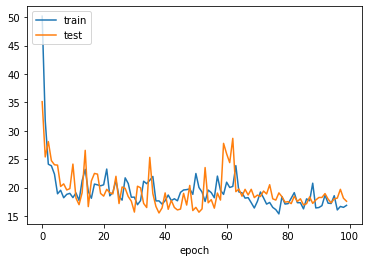

In [42]:
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('epoch')
plt.show()

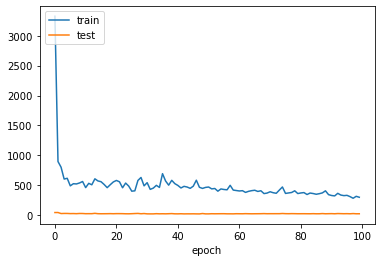

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('epoch')
plt.show()